In [116]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [117]:
using enso_project, Plots, JLD2, ReservoirComputing, CSV, DataFrames

## load data

In [118]:
header = ["year", "month", "day", "hour", "PC1 coeff", "PC2 coeff", "PC1+PC2 amplitude"]
data = CSV.read("data/mjo_data/mjo_romi.txt", DataFrame; delim=" ", ignorerepeated=true, header=header);

pc1 = data[!,"PC1 coeff"]
pc2 = data[!,"PC2 coeff"]

train_size= 10000 
val_size= 2000 + 12*7 # because in TDE case everything is shifted by 12*7 (emb. dim . * \tau), account for this to make it comparable
test_size = length(pc1) - train_size - val_size

data= Matrix(transpose([pc1 pc2]))

pc1_test = data[1:1, train_size+val_size+1:train_size+val_size+test_size]
pc2_test = data[2:2, train_size+val_size+1:train_size+val_size+test_size];

In [119]:
pc2_test

1×519 Matrix{Float64}:
 -1.0902  -1.10705  -1.06785  -1.07553  …  -0.40887  -0.38871  -0.34477

## no TDE

In [167]:
# load esns
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_no_tde_pc1.jld2" esn_pc1
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_no_tde_pc1_W.jld2" W_out_pc1
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_no_tde_pc2.jld2" esn_pc2
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_no_tde_pc2_W.jld2" W_out_pc2;

#### create plots

In [168]:
prediction_D1 = enso_project.esn_eval_pred(esn_pc1, W_out_pc1, pc1_test)
prediction_D2 = enso_project.esn_eval_pred(esn_pc2, W_out_pc2, pc2_test);

In [169]:
phase_plot_no_tde = plot(pc1_test[1,1:60], pc2_test[1,1:60], ylim=(-3,4.2), label="test data", xlabel="RMM1",ylabel="RMM2", title="MJO prediction, ESN (no TDE)")
plot!(prediction_D1[1:60], prediction_D2[1:60], label="prediction")
scatter!([pc1_test[1,1]], [pc2_test[1,1]], label="start", color=:blue, marker=:circle, markersize=4)
scatter!([prediction_D1[1]], [prediction_D2[1]], label="start", color=:orange, marker=:circle, markersize=4)
scatter!([pc1_test[1,5]], [pc2_test[1,5]], label="t=5", color=:black, marker=:circle, markersize=4)
scatter!([prediction_D1[5]], [prediction_D2[5]], label="", color=:black, marker=:circle, markersize=4);

In [170]:
pc1_no_tde = plot(prediction_D1[1:60], ylim=(-2,4), ylabel="RMM1", xlabel="days", label ="pred")
plot!(pc1_test[1,1:60], label="true")

pc2_no_tde = plot(prediction_D2[1:60], ylim=(-2,4), ylabel="RMM1", xlabel="days", label ="pred")
plot!(pc2_test[1,1:60], label="true");

## TDE

In [171]:
# load esns
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_tde_pc1.jld2" esn_pc1
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_tde_pc1_W.jld2" W_out_pc1
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_tde_pc2.jld2" esn_pc2
@load "C:/Users/lisah/Documents/Repos/enso_project.jl/temp_saves/esn_saves/mjo_tde_pc2_W.jld2" W_out_pc2;

#### create plots

In [172]:
prediction_D1 = enso_project.esn_eval_pred(esn_pc1, W_out_pc1, pc1_test)
prediction_D2 = enso_project.esn_eval_pred(esn_pc2, W_out_pc2, pc2_test);

In [173]:
phase_plot_tde = plot(pc1_test[1,1:60], pc2_test[1,1:60], ylim=(-3,4.2), label="test data", xlabel="RMM1",ylabel="RMM2", title="MJO prediction, ESN + TDE")
plot!(prediction_D1[1:60], prediction_D2[1:60], label="prediction")
scatter!([pc1_test[1,1]], [pc2_test[1,1]], label="start", color=:blue, marker=:circle, markersize=4)
scatter!([prediction_D1[1]], [prediction_D2[1]], label="start", color=:orange, marker=:circle, markersize=4)
scatter!([pc1_test[1,20]], [pc2_test[1,20]], label="t=20", color=:black, marker=:circle, markersize=4)
scatter!([prediction_D1[20]], [prediction_D2[20]], label="", color=:black, marker=:circle, markersize=4);

In [174]:
pc1_tde = plot(prediction_D1[1:60], ylim=(-3,4.2), ylabel="RMM1", xlabel="days", label ="pred")
plot!(pc1_test[1,1:60], label="true")

pc2_tde = plot(prediction_D2[1:60], ylim=(-3,4.2), ylabel="RMM1", xlabel="days", label ="pred")
plot!(pc2_test[1,1:60], label="true");

## compare

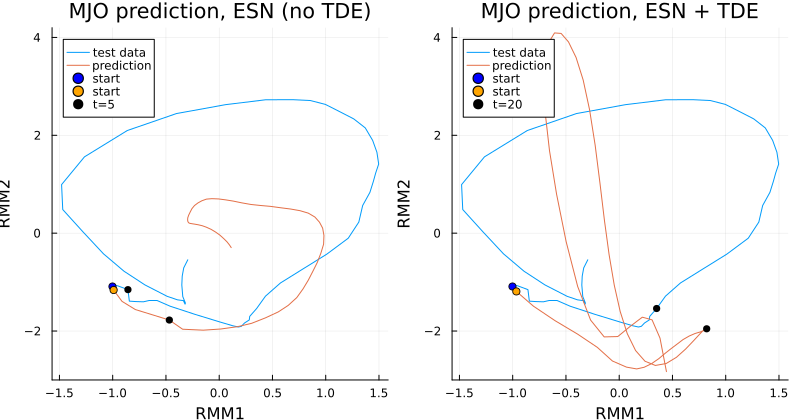

In [175]:
plot(phase_plot_no_tde, phase_plot_tde, layout=(1,2), size=(800,420))

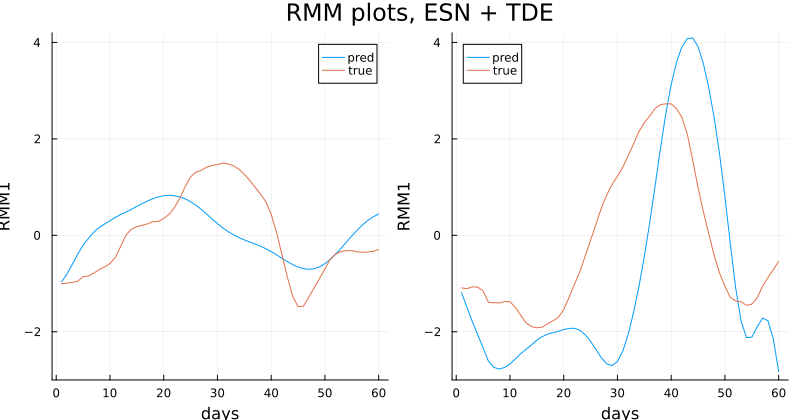

In [176]:
plot(pc1_tde, pc2_tde, layout=(1,2), size=(800,420), suptitle="RMM plots, ESN + TDE")

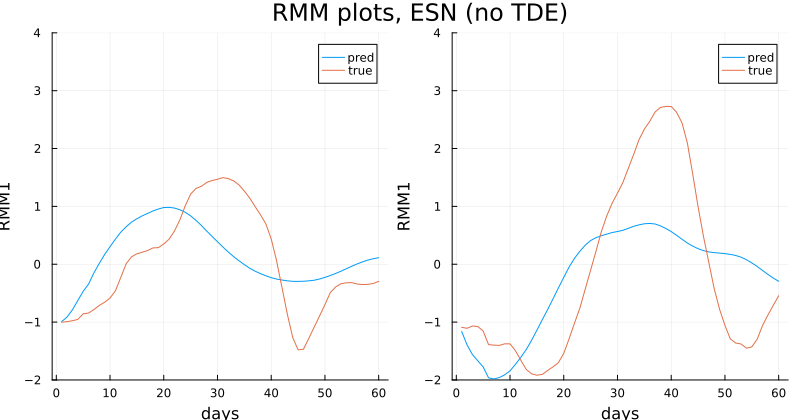

In [177]:
plot(pc1_no_tde, pc2_no_tde, layout=(1,2), size=(800,420), suptitle="RMM plots, ESN (no TDE)")